##**Library Installation**

In [ ]:
# Import Necessary libraries
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

##**Loading Diabetes Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DM/DM Assignment/diabetes.csv")

In [ ]:
# Get familier with dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Column Description of Datasets:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:**Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)2)

**DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

**Age:** Age (years)

**Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)

## **Data Exploration**

In [ ]:
# Show top 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Review dataset statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


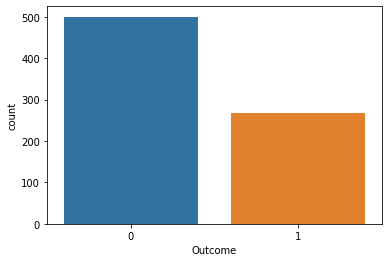

In [ ]:
# Analysis of diabetes outcomes
sns.countplot('Outcome', data = df)

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
attribute_corr = df.corr()
print(attribute_corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

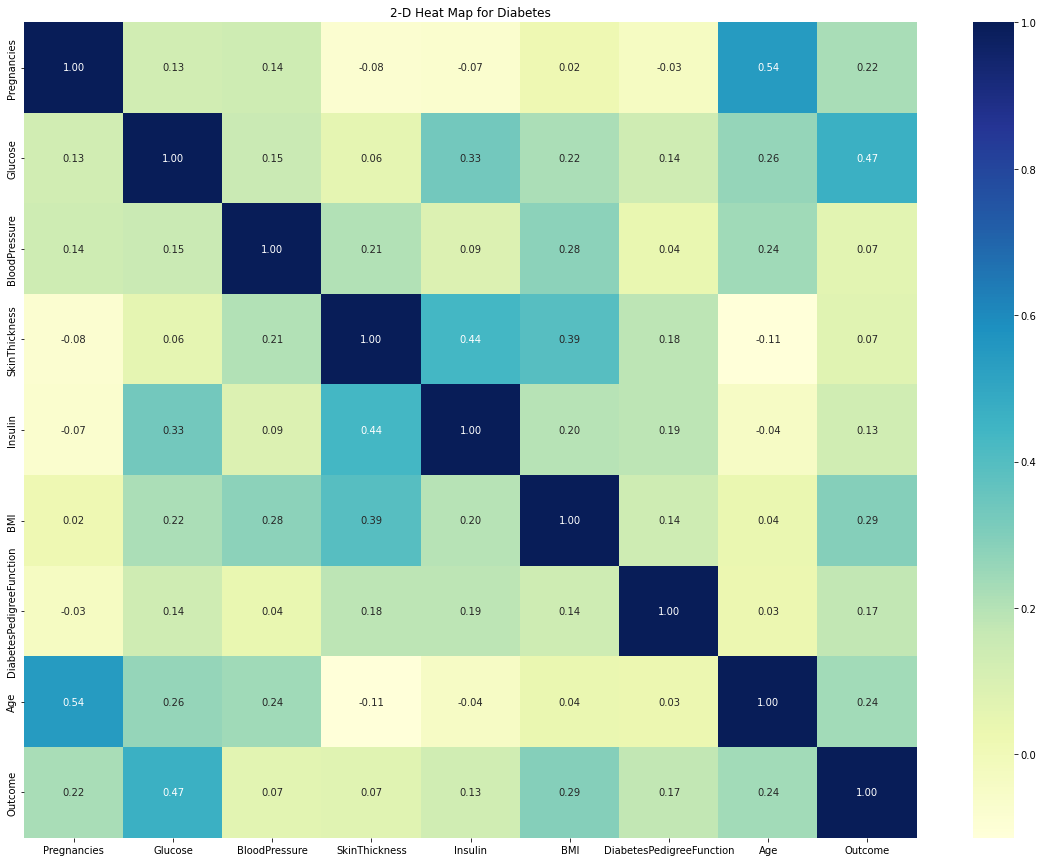

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title( "2-D Heat Map for Diabetes" )
plt.show()

From above observation, features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome.

##**Data Preprocessing**

#### **1. Missing Value Analysis**

In [ ]:
# Ceack for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

All Columns are good and No columns found with null values

#### **2. Handle the Noisy Data**

In diabetes datasets the features like Glucose, BloodPressure, Insulin, SkinThickness has 0 values which is not possible. We will  replace zero values with  mean of its respective column.

In [ ]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


In [ ]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [ ]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) 

In [ ]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [ ]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [ ]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

####**3.Outlier Detection**


In this part we wil removed all the records with outlined in dataset. Outliers impacts Model accuracy.

Text(0.5, 1.0, 'SkinThickness')

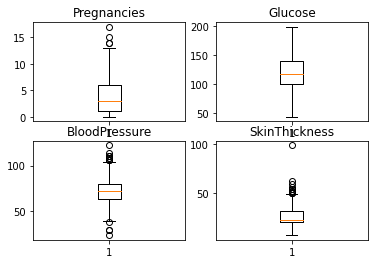

In [ ]:
fig, axs = plt.subplots(2, 2)

# Outlier Detection in Pregnancies
axs[0, 0].boxplot(df['Pregnancies'])
axs[0, 0].set_title('Pregnancies')

# Outlier Detection in Glucose
axs[0, 1].boxplot(df['Glucose'])
axs[0, 1].set_title('Glucose')

# Outlier Detection in Blood Pressure
axs[1, 0].boxplot(df['BloodPressure'])
axs[1, 0].set_title('BloodPressure')

# Outlier Detection in SkinThickness
axs[1, 1].boxplot(df['SkinThickness'])
axs[1, 1].set_title('SkinThickness')


Text(0.5, 1.0, 'Age')

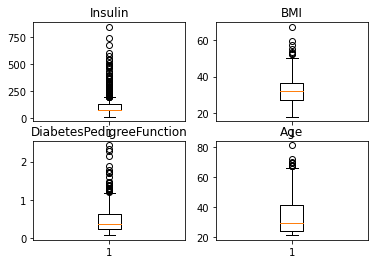

In [ ]:
fig, axs = plt.subplots(2, 2)

# Outlier Detection in Insulin
axs[0, 0].boxplot(df['Insulin'])
axs[0, 0].set_title('Insulin')

# Outlier Detection in BMI
axs[0, 1].boxplot(df['BMI'])
axs[0, 1].set_title('BMI')

# Outlier Detection in DiabetesPedigreeFunction
axs[1, 0].boxplot(df['DiabetesPedigreeFunction'])
axs[1, 0].set_title('DiabetesPedigreeFunction')

# Outlier Detection in Age
axs[1, 1].boxplot(df['Age'])
axs[1, 1].set_title('Age')

In [ ]:
from collections import Counter

In [ ]:
def outliers_detector(df,Column):
    outliers = []
    for x in Column:               # iterate over columns
        Q1 = np.percentile(df[x], 25)
        Q3 = np.percentile(df[x],75)
        IQR = Q3 - Q1
        out_limit = 1.5 * IQR    
        out_col_list = df[(df[x] < Q1 - out_limit) | (df[x] > Q3 + out_limit )].index     # Determine a list of indices of outliers column
        outliers.extend(out_col_list) # Append the found outlier indices for col to the list of outlier indices  
    outlier_indices = Counter(outliers)  # select observations containing more than 2 outliers
    multiple_outliers = list( m for m in outlier_indices.items())
    return multiple_outliers   

In [ ]:
# Detect outliers from numeric Column
outliers_to_drop = outliers_detector(df, ["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

All Outliers from all the features such as Pregnancies, Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, SkinThickness, Insulin, and Age.

In [ ]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

All the Outliers are removed successfully

#### **4. Data Transformation to Standard Normal Distribution**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Make New data frame without Class Label
df1 = df.iloc[:,[0,1,2,3,4,5,6,7]]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [ ]:
# Make data frame for Class Label
df_label = df.iloc[:,[8]]
df_label.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# Data Transformation to Normal distribution
q  = StandardScaler()
X = q.fit_transform(df1)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df1 = transformedDF

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Show top 5 rows
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.638586,0.869296,-0.020415,0.884700,-0.419308,0.174011,0.486969,1.424610
1,-0.846542,-1.205598,-0.515704,0.255839,-0.419308,-0.854482,-0.365500,-0.191523
2,1.232637,2.022015,-0.680800,-0.631227,-0.419308,-1.339343,0.625958,-0.106463
3,-0.846542,-1.073859,-0.515704,-0.373023,-0.266620,-0.634091,-0.933813,-1.042119
4,-1.143568,0.507013,-2.661954,0.884700,0.529049,1.569823,5.617225,-0.021404


In [ ]:
df = pd.concat([df1, df_label], axis=1, join='inner')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.638586,0.869296,-0.020415,0.884700,-0.419308,0.174011,0.486969,1.424610,1
1,-0.846542,-1.205598,-0.515704,0.255839,-0.419308,-0.854482,-0.365500,-0.191523,0
2,1.232637,2.022015,-0.680800,-0.631227,-0.419308,-1.339343,0.625958,-0.106463,1
3,-0.846542,-1.073859,-0.515704,-0.373023,-0.266620,-0.634091,-0.933813,-1.042119,0
4,-1.143568,0.507013,-2.661954,0.884700,0.529049,1.569823,5.617225,-0.021404,1


## **Data Splitting into Training and Testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splits dataset into train (70%) and test (30%) dataset
features = df.drop(["Outcome"], axis=1)
labels = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

## **Machine Learning Model**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Train Data using Logistic Regression
logi_model = LogisticRegression()
logi_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Predict Test set using Logistic Regression
y_logi_pred = logi_model.predict(x_test)
y_logi_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# Convert Class label test to array
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Make Confusion Matrix
print(metrics.confusion_matrix(y_test, y_logi_pred))

[[136  10]
 [ 54  30]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_logi_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       146
           1       0.75      0.36      0.48        84

    accuracy                           0.72       230
   macro avg       0.73      0.64      0.65       230
weighted avg       0.73      0.72      0.69       230



In [ ]:
# Calculation of Accuracy Score
logi_accuracy = accuracy_score(y_test, y_logi_pred)
logi_accuracy = round(logi_accuracy, 4)
print("Accuracy of Logistic Regression Model = ", logi_accuracy * 100, "%")

Accuracy of Logistic Regression Model =  72.17 %


### **2. Support Vector Machine** 

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Train Data using Logistic Regression
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [ ]:
# Predict Test set using logistic Regression
y_svc_pred = svc_model.predict(x_test)
y_svc_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_svc_pred))

[[140   6]
 [ 65  19]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.80       146
           1       0.76      0.23      0.35        84

    accuracy                           0.69       230
   macro avg       0.72      0.59      0.57       230
weighted avg       0.71      0.69      0.63       230



In [ ]:
# Calculation of Accuracy Score
svc_accuracy = accuracy_score(y_test, y_svc_pred)
svc_accuracy = round(svc_accuracy, 4)
print("Accuracy of Logistic Regression Model = ", svc_accuracy * 100, "%")

Accuracy of Logistic Regression Model =  69.13 %


### **3. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train Data using Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict Test set using logistic Regression
y_dtc_pred = dtc_model.predict(x_test)
y_dtc_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_dtc_pred))

[[100  46]
 [ 44  40]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_dtc_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       146
           1       0.47      0.48      0.47        84

    accuracy                           0.61       230
   macro avg       0.58      0.58      0.58       230
weighted avg       0.61      0.61      0.61       230



In [ ]:
# Calculation of Accuracy Score
dtc_accuracy = accuracy_score(y_test, y_dtc_pred)
dtc_accuracy = round(dtc_accuracy,4)
print("Accuracy of Decision Tree Classifier Model = ", dtc_accuracy * 100, "%")

Accuracy of Decision Tree Classifier Model =  60.870000000000005 %


###**4. KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train Data using Decision Tree Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict Test set using KNN Classifier
y_knn_pred = knn_model.predict(x_test)
y_knn_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_knn_pred))

[[119  27]
 [ 50  34]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       146
           1       0.56      0.40      0.47        84

    accuracy                           0.67       230
   macro avg       0.63      0.61      0.61       230
weighted avg       0.65      0.67      0.65       230



In [ ]:
# Calculation of Accuracy Score
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_accuracy = round(knn_accuracy, 4)
print("Accuracy of KNN Model = ", knn_accuracy * 100, "%")

Accuracy of KNN Model =  66.52 %


### **5. Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Train Data using Decision Tree Classifier
nbc_model = GaussianNB()
nbc_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Predict Test set using KNN Classifier
y_nbc_pred = nbc_model.predict(x_test)
y_nbc_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_nbc_pred))

[[122  24]
 [ 40  44]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_nbc_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       146
           1       0.65      0.52      0.58        84

    accuracy                           0.72       230
   macro avg       0.70      0.68      0.69       230
weighted avg       0.71      0.72      0.71       230



In [ ]:
# Calculation of Accuracy Score
nbc_accuracy = accuracy_score(y_test, y_logi_pred)
nbc_accuracy = round(nbc_accuracy, 4)
print("Accuracy of Naive Bayes Calssifier Model = ", nbc_accuracy * 100, "%")

Accuracy of Naive Bayes Calssifier Model =  72.17 %


### **6. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train Data using Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict Test set using Random Forest Classifier
y_rf_pred = rf_model.predict(x_test)
y_rf_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_rf_pred))

[[121  25]
 [ 53  31]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       146
           1       0.55      0.37      0.44        84

    accuracy                           0.66       230
   macro avg       0.62      0.60      0.60       230
weighted avg       0.64      0.66      0.64       230



In [ ]:
# Calculation of Accuracy Score
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_accuracy = round(rf_accuracy, 4)
print("Accuracy of Random Forest Classifier Model = ", rf_accuracy * 100, "%")

Accuracy of Random Forest Classifier Model =  66.09 %


### **7. Linear Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Train Data using Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Predict Test set using  Linear Discriminant Analysis Classifier
y_lda_pred = lda_model.predict(x_test)
y_lda_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_lda_pred))

[[136  10]
 [ 53  31]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_lda_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       146
           1       0.76      0.37      0.50        84

    accuracy                           0.73       230
   macro avg       0.74      0.65      0.65       230
weighted avg       0.73      0.73      0.70       230



In [ ]:
# Calculation of Accuracy Score
lda_accuracy = accuracy_score(y_test, y_lda_pred)
lda_accuracy = round(lda_accuracy, 4)
print("Accuracy of Linear Discriminant Analysis Model = ", lda_accuracy * 100, "%")

Accuracy of Linear Discriminant Analysis Model =  72.61 %


###**8. Perceptron Model**

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
# Train Data using Random Forest Classifier
perceptron_model = Perceptron(alpha = 0.05, max_iter = 500)
perceptron_model.fit(x_train, y_train)

Perceptron(alpha=0.05, max_iter=500)

In [ ]:
# Predict Test set using Random Forest Classifier
y_perceptron_pred = perceptron_model.predict(x_test)
y_perceptron_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_lda_pred))

[[136  10]
 [ 53  31]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_perceptron_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       146
           1       0.50      0.38      0.43        84

    accuracy                           0.63       230
   macro avg       0.59      0.58      0.58       230
weighted avg       0.62      0.63      0.62       230



In [ ]:
# Calculation of Accuracy Score
perceptron_accuracy = accuracy_score(y_test, y_perceptron_pred)
perceptron_accuracy = round(perceptron_accuracy, 4)
print("Accuracy of Perceptron Model = ", perceptron_accuracy * 100, "%")

Accuracy of Perceptron Model =  63.480000000000004 %


### **9. AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Train Data using Random Forest Classifier
abc_model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [ ]:
# Predict Test set using Random Forest Classifier
y_abc_pred = abc_model.predict(x_test)
y_abc_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_abc_pred))

[[115  31]
 [ 47  37]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_abc_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       146
           1       0.54      0.44      0.49        84

    accuracy                           0.66       230
   macro avg       0.63      0.61      0.62       230
weighted avg       0.65      0.66      0.65       230



In [ ]:
# Calculation of Accuracy Score
abc_accuracy = accuracy_score(y_test, y_abc_pred)
abc_accuracy = round(abc_accuracy, 4)
print("Accuracy of Adaboost Classifier Model = ", abc_accuracy * 100, "%")

Accuracy of Adaboost Classifier Model =  66.09 %


###**10. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Train Data using Gradient Boosting Classifier Classifier
gbc_model = GradientBoostingClassifier(n_estimators=50, learning_rate=1)
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=50)

In [ ]:
# Predict Test set using Gradient Boosting Classifier Classifier
y_gbc_pred = gbc_model.predict(x_test)
y_gbc_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_gbc_pred))

[[106  40]
 [ 43  41]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_gbc_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       146
           1       0.51      0.49      0.50        84

    accuracy                           0.64       230
   macro avg       0.61      0.61      0.61       230
weighted avg       0.64      0.64      0.64       230



In [ ]:
# Calculation of Accuracy Score
gbc_accuracy = accuracy_score(y_test, y_gbc_pred)
gbc_accuracy = round(gbc_accuracy, 4)
print("Accuracy of Logistic Regression Model = ", gbc_accuracy * 100, "%")

Accuracy of Logistic Regression Model =  63.91 %


### **11. Bagging for Classification**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Train Data using Gradient Boosting Classifier Classifier
bc_model = BaggingClassifier()
bc_model.fit(x_train, y_train)

BaggingClassifier()

In [ ]:
# Predict Test set using Gradient Boosting Classifier Classifier
y_bc_pred = bc_model.predict(x_test)
y_bc_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# Convert test set into array form
y_test.to_numpy()

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Analysis using Confusion Matrix.
print(metrics.confusion_matrix(y_test, y_bc_pred))

[[119  27]
 [ 61  23]]


In [ ]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_bc_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       146
           1       0.46      0.27      0.34        84

    accuracy                           0.62       230
   macro avg       0.56      0.54      0.54       230
weighted avg       0.59      0.62      0.59       230



In [ ]:
# Calculation of Accuracy Score
bc_accuracy = accuracy_score(y_test, y_bc_pred)
bc_accuracy = round(bc_accuracy, 4)
print("Accuracy of Logistic Regression Model = ", bc_accuracy * 100, "%")

Accuracy of Logistic Regression Model =  61.739999999999995 %
